## Data Exploration

In [1]:
# 1.1 import libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore', category=FutureWarning)

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [2]:
# 1.2 Load the data 
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

# checking dataset description and keys
# print(mnist.DESCR)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# 1.3.1 Split the data into features and labels
X = mnist['data'] # Features
y = mnist['target'].astype(np.uint8) # Target

In [4]:
# Define the fraction of the dataset to extract
frac = 1

# Calculate the number of samples to extract
num_samples = int(frac * len(X))
X_sampled = X[:num_samples]
y_sampled = y[:num_samples]

In [5]:
print(X_sampled.shape)
print(y_sampled.shape)

(70000, 784)
(70000,)


In [6]:
# 1.3.2 Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [7]:
# 1.3.3 Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [8]:
# Check train, val, test shapes
print("Training Features:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Validation Features:", X_val.shape)
print("Validation Labels:", y_val.shape)
print("Test Features:", X_test.shape)
print("Test Features:", y_test.shape)

Training Features: (42000, 784)
Training Labels: (42000,)
Validation Features: (14000, 784)
Validation Labels: (14000,)
Test Features: (14000, 784)
Test Features: (14000,)


## Data Visualization

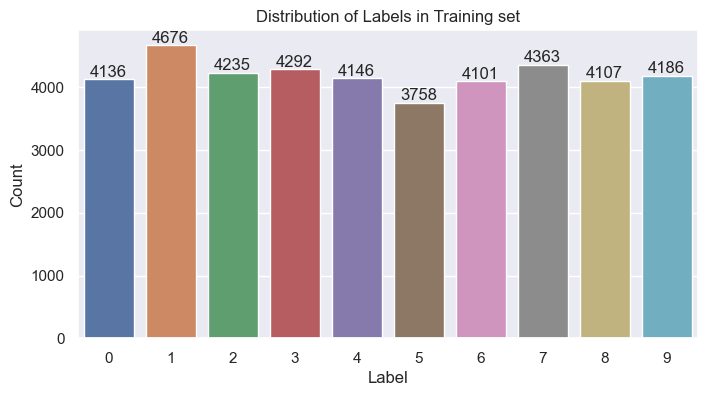

In [9]:
# Visualize train-labels in bar chart
sns.set()

plt.figure(figsize=(8, 4))

# Create count plot
ax = sns.countplot(x=y_train)

# Add title and labels
ax.set_title('Distribution of Labels in Training set')
ax.set_xlabel('Label')
ax.set_ylabel('Count')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

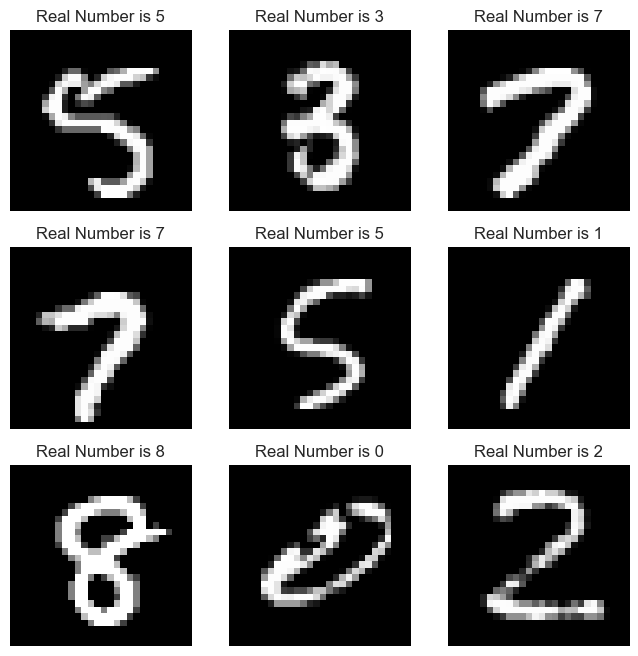

In [10]:
# visualising some images

# Generate 9 random indices
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Visualize the randomly selected numbers
fig, axis = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axis.flat):
    ax.imshow(X_train[random_indices[i]].reshape(28, 28), cmap='gray')
    real_number = y_train[random_indices[i]]
    ax.axis('off')
    ax.set(title = f"Real Number is {real_number}");

plt.show()

In [27]:
print(X_train[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Data Preprocessing

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)  

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled.copy()
X_val = X_val_scaled.copy()
X_test = X_test_scaled.copy()
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
del X_train_scaled, X_val_scaled, X_test_scaled

(42000, 784)
(14000, 784)
(14000, 784)


In [12]:
# Check if scaler has been executed. (if mean is close to 0 and std is close to 1)
print("Mean of X_train_scaled:", X_train.mean())
print("Standard deviation of X_train_scaled:", X_train.std())
print("Mean of X_val_scaled:", X_val.mean())
print("Standard deviation of X_val_scaled:", X_val.std())
print("Mean of X_test_scaled:", X_test.mean())
print("Standard deviation of X_test_scaled:", X_test.std())

Mean of X_train_scaled: 0.1310782445461515
Standard deviation of X_train_scaled: 0.30861796438620054
Mean of X_val_scaled: 0.131247355139532
Standard deviation of X_val_scaled: 0.3182579904730157
Mean of X_test_scaled: 0.13022791300740982
Standard deviation of X_test_scaled: 0.3095366585719285


## Initialize and train Models

In [13]:
# Step 1: Initialize and Train Models
rf_clf = RandomForestClassifier(random_state=42)
knn_clf = KNeighborsClassifier()
svm_clf = LinearSVC(random_state=42)
sgd_clf = SGDClassifier(random_state=42, loss='log')

model1=rf_clf.fit(X_train, y_train)
model2=knn_clf.fit(X_train, y_train)
model3=svm_clf.fit(X_train, y_train)
model4=sgd_clf.fit(X_train, y_train)

/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training the RandomForestClassifier(random_state=42)
mean Accuracy score: 0.966
std score: 0.001
Training the KNeighborsClassifier()
mean Accuracy score: 0.965
std score: 0.001
Training the LinearSVC(random_state=42)


/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


mean Accuracy score: 0.91
std score: 0.002
Training the SGDClassifier(loss='log', random_state=42)
mean Accuracy score: 0.911
std score: 0.002


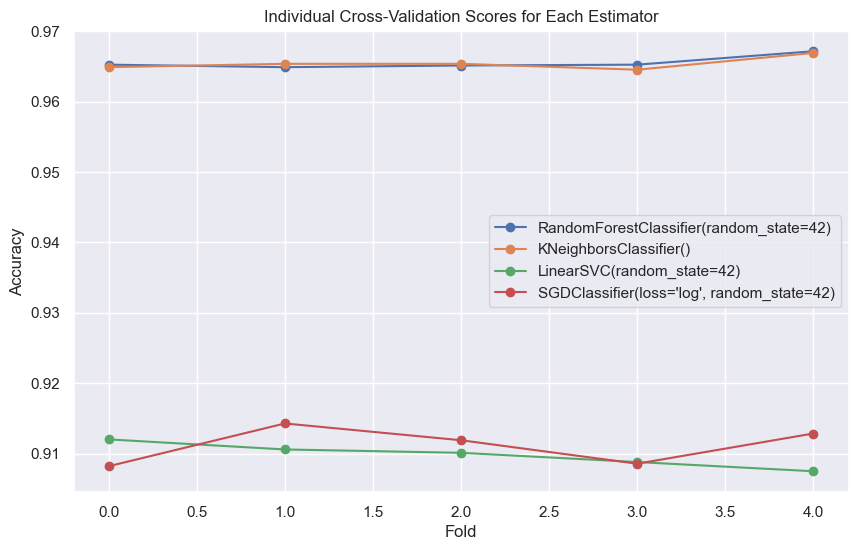

CPU times: user 7min 40s, sys: 22.4 s, total: 8min 2s
Wall time: 4min 58s


In [14]:
%%time

from sklearn.model_selection import cross_val_score

# Define the estimators
estimators = [model1, model2, model3, model4]

# Create a figure and axis object
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Perform k-fold cross-validation and plot individual scores for each estimator
for estimator in estimators:
    print("Training the", estimator)
    scores = cross_val_score(estimator, X_train, y_train, cv=5)  # 5-fold cross-validation
    ax.plot(scores, marker='o', linestyle='-', label=estimator)
    print('mean Accuracy score:', round(scores.mean(), 3))
    print('std score:', round(scores.std(), 3))
    
# Set labels and title
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Individual Cross-Validation Scores for Each Estimator')
ax.legend()

# Show the plot
plt.grid(True)
plt.show()

In [15]:
# Step 2: Evaluate on Validation Set
y_pred_val_rf = model1.predict(X_val)
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print("Random Forest Validation Accuracy before Hyperparameter Tuning:", accuracy_val_rf)

y_pred_val_knn = model2.predict(X_val)
accuracy_val_knn = accuracy_score(y_val, y_pred_val_knn)
print("KNN Validation Accuracy before Hyperparameter Tuning:", accuracy_val_knn)


Random Forest Validation Accuracy before Hyperparameter Tuning: 0.9652857142857143
KNN Validation Accuracy before Hyperparameter Tuning: 0.9697857142857143


In [16]:
%%time

# Step 3.1: Hyperparameter Tuning for RandomForestClassifier

from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [150, 250],
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
model1=grid_search_rf.fit(X_train, y_train)

# Best hyperparameters found
best_params = model1.best_params_
print("Best Hyperparameters:", best_params)
print("Best accuracy:", model1.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}
Best accuracy: 0.9673095238095237
CPU times: user 38.7 s, sys: 555 ms, total: 39.2 s
Wall time: 3min 46s


In [17]:
# Evaluate model with best hyperparameters on validation set
y_pred_val_tuned = model1.predict(X_val)
accuracy_val_tuned = accuracy_score(y_val, y_pred_val_tuned)
print("Validation Accuracy after Hyperparameter Tuning:", accuracy_val_tuned)

Validation Accuracy after Hyperparameter Tuning: 0.9673571428571428


In [18]:
%%time

# Step 3.2: Hyperparameter Tuning for KNN Classifier

param_grid_knn = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
grid_search_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
model2=grid_search_knn.fit(X_train, y_train)

# Best hyperparameters found for KNeighborsClassifier
best_params_knn = model2.best_params_
print("Best Hyperparameters for KNeighborsClassifier:", best_params_knn)

/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

Best Hyperparameters for KNeighborsClassifier: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
CPU times: user 197 ms, sys: 258 ms, total: 456 ms
Wall time: 12min 39s


In [19]:
# Evaluate model with best hyperparameters on validation set for KNeighborsClassifier
y_pred_val_tuned_knn = model2.predict(X_val)
accuracy_val_tuned_knn = accuracy_score(y_val, y_pred_val_tuned_knn)
print("KNN Validation Accuracy after Hyperparameter Tuning:", accuracy_val_tuned_knn)


KNN Validation Accuracy after Hyperparameter Tuning: 0.9729285714285715


In [20]:
%%time
# Step 7: Initialize and Fit Voting Classifier
voting_clf = VotingClassifier([
    ('rf', model1.best_estimator_),
    ('knn', model2.best_estimator_)
], voting='soft')

model=voting_clf.fit(X_train, y_train)

# Step 8: Evaluate Voting Classifier on Validation Set
y_pred_val_voting = model.predict(X_val)
accuracy_val_voting = accuracy_score(y_val, y_pred_val_voting)
print("Voting Classifier Validation Accuracy:", accuracy_val_voting)

Voting Classifier Validation Accuracy: 0.9748571428571429
CPU times: user 1min 57s, sys: 8.47 s, total: 2min 6s
Wall time: 55.8 s


# 4 Model Evaluation

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate additional evaluation metrics
precision = precision_score(y_val, y_pred_val_voting, average='weighted')
recall = recall_score(y_val, y_pred_val_voting, average='weighted')
f1 = f1_score(y_val, y_pred_val_voting, average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred_val_voting)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.9749602596215758
Recall: 0.9748571428571429
F1-score: 0.974820617982752
Confusion Matrix:
[[1416    1    1    1    1    0    4    0    0    0]
 [   1 1594    2    1    1    0    0    2    0    0]
 [   9    5 1331    3    2    2    1   19    3    0]
 [   1    3    4 1370    1   12    1   10    9    5]
 [   1    5    0    0 1352    0    4    2    0   19]
 [   4    0    1   10    1 1240   14    3    3    6]
 [  11    4    1    0    1    1 1360    0    1    0]
 [   0   12    6    0    2    0    0 1398    0    9]
 [   1   14    1   16    2   15    6    0 1284   22]
 [   6    1    3   12    7    6    1   11    2 1303]]


In [24]:
# Concatenate training and validation data

X_train_full = np.concatenate((X_train, X_val))
y_train_full = np.concatenate((y_train, y_val))

print(X_train_full.shape)
print(X_train.shape)
# Re-train the model on the full training data
voting_clf.fit(X_train_full, y_train_full)

# Predict on the test data
y_pred_test = voting_clf.predict(X_test)

accuracy_test_votingclf = accuracy_score(y_test, y_pred_test)
print("Voting Classifier test Accuracy:", accuracy_test_votingclf)

(56000, 784)
(42000, 784)
Voting Classifier test Accuracy: 0.9747142857142858


In [32]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(y_test, y_pred_test)

# Print classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.97      0.99      0.98      1600
           2       0.98      0.97      0.97      1380
           3       0.98      0.96      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.95      0.97      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.98      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



# 5 Model Storing

In [ ]:
from joblib import dump

# Save the trained model
model_filename = "voting_clf_model.joblib"
dump(voting_clf, model_filename)

In [ ]:
from joblib import load

# Load the saved model
loaded_model = load(model_filename)